In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

salarios = pd.read_csv("Salaries1.csv")
season_Stats = pd.read_csv("Seasons_Stats.csv")


In [ ]:
#salarios.head()
season_Stats.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


**Limpieza de datos**

In [ ]:
season_Stats_sin_NA = season_Stats.fillna(0)
#season_Stats_sin_NA


season_Stats_sin_NA = season_Stats.fillna({
    "GS":season_Stats["GS"].median(),
    "MP":season_Stats["MP"].median(),
    "PER":season_Stats["PER"].median(),
    "3PAr":season_Stats["3PAr"].median(),
    "ORB%":season_Stats["ORB%"].median(),
    "3PAr":season_Stats["3PAr"].median(),
    "DRB%":season_Stats["DRB%"].median(),
    "TRB%":season_Stats["TRB%"].median(),
    "AST%":season_Stats["AST%"].median(),
    "STL%":season_Stats["STL%"].median(),
    "BLK%":season_Stats["BLK%"].median(),
    "TOV%":season_Stats["TOV%"].median(),
    "USG%":season_Stats["USG%"].median(),
    "3PAr":season_Stats["3PAr"].median(),
    "WS/48":season_Stats["WS/48"].median(),
    "OBPM":season_Stats["OBPM"].median(),
    "DBPM":season_Stats["DBPM"].median(),
    "VORP":season_Stats["VORP"].median(),
    "3P":season_Stats["3P"].median(),
    "3PA":season_Stats["3PA"].median(),
    "3P%":season_Stats["3P%"].median(),
    "ORB":season_Stats["ORB"].median(),
    "DRB":season_Stats["DRB"].median(),
    "TRB":season_Stats["TRB"].median(),
    "STL":season_Stats["STL"].median(),
    "BLK":season_Stats["BLK"].median(),
    "TOV":season_Stats["TOV"].median()


})


season_Stats_limpia = season_Stats_sin_NA.replace(r'[^\w\s]|_', '', regex=True)
season_Stats_limpia

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,GF,31.0,FTW,63.0,8.0,1053.0,12.7,...,0.705,38.0,106.0,159.0,176.0,29.0,11.0,55.0,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,8.0,1053.0,12.7,...,0.708,38.0,106.0,159.0,109.0,29.0,11.0,55.0,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,8.0,1053.0,12.7,...,0.698,38.0,106.0,159.0,140.0,29.0,11.0,55.0,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,8.0,1053.0,12.7,...,0.559,38.0,106.0,159.0,20.0,29.0,11.0,55.0,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,8.0,1053.0,12.7,...,0.548,38.0,106.0,159.0,20.0,29.0,11.0,55.0,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


**Cruce de tablas**

In [ ]:
tabla_base = season_Stats_limpia.merge(salarios,left_on="Player", right_on="NAME",how="left")
tabla_base


,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,STL,BLK,TOV,PF,PTS,RK,NAME,TEAM,SALARY,Team Rank
0,0,1950.0,Curly Armstrong,GF,31.0,FTW,63.0,8.0,1053.0,12.7,...,29.0,11.0,55.0,217.0,458.0,NaN,NaN,NaN,NaN,NaN
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,8.0,1053.0,12.7,...,29.0,11.0,55.0,99.0,279.0,NaN,NaN,NaN,NaN,NaN
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,8.0,1053.0,12.7,...,29.0,11.0,55.0,192.0,438.0,NaN,NaN,NaN,NaN,NaN
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,8.0,1053.0,12.7,...,29.0,11.0,55.0,29.0,63.0,NaN,NaN,NaN,NaN,NaN
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,8.0,1053.0,12.7,...,29.0,11.0,55.0,27.0,59.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,62.0,58.0,65.0,189.0,639.0,176.0,Cody Zeller,CHO,5318313.0,9.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,7.0,21.0,20.0,61.0,178.0,124.0,Tyler Zeller,BOS,8000000.0,4.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,2.0,5.0,3.0,17.0,23.0,391.0,Stephen Zimmerman,ORL,950000.0,15.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,15.0,16.0,40.0,78.0,240.0,410.0,Paul Zipser,CHI,750000.0,15.0


**Trabajar con tabla nueva**

In [197]:
tabla_base.describe()

,Unnamed: 0,Year,Age,G,GS,MP,PER,TS%,3PAr,FTr,...,TRB,AST,STL,BLK,TOV,PF,PTS,RK,SALARY,Team Rank
count,24691.000000,24624.000000,24616.000000,24624.000000,24691.000000,24691.000000,24691.000000,24538.000000,24691.000000,24525.000000,...,24691.000000,24624.000000,24691.000000,24691.000000,24691.000000,24624.000000,24624.000000,3219.000000,3.219000e+03,3219.00000
mean,12345.000000,1992.594989,26.664405,50.837110,19.514884,1206.210279,12.484351,0.493001,0.136182,0.325455,...,223.629865,114.852623,38.178486,22.345875,70.069175,116.339222,510.116350,206.825722,7.308336e+06,7.41721
std,7127.822084,17.429594,3.841892,26.496161,25.541057,930.836036,5.966518,0.094469,0.168643,0.218971,...,226.575777,135.863913,35.750614,34.251258,60.880216,84.791873,492.922981,139.330950,6.967689e+06,4.80886
min,0.000000,1950.000000,18.000000,1.000000,0.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.767000e+03,1.00000
25%,6172.500000,1981.000000,24.000000,27.000000,1.000000,354.000000,9.900000,0.458000,0.012000,0.208000,...,52.500000,19.000000,12.000000,4.000000,26.000000,39.000000,106.000000,90.000000,1.296240e+06,3.00000
50%,12345.000000,1996.000000,26.000000,58.000000,8.000000,1053.000000,12.700000,0.506000,0.064000,0.296000,...,159.000000,68.000000,29.000000,11.000000,55.000000,109.000000,364.000000,183.000000,5.000000e+06,6.00000
75%,18517.500000,2007.000000,29.000000,75.000000,26.000000,1948.000000,15.500000,0.544000,0.215000,0.400000,...,318.000000,160.000000,53.000000,24.000000,95.000000,182.000000,778.000000,330.000000,1.124200e+07,11.50000
max,24690.000000,2017.000000,44.000000,88.000000,83.000000,3882.000000,129.100000,1.136000,1.000000,6.000000,...,2149.000000,1164.000000,301.000000,456.000000,464.000000,386.000000,4029.000000,486.000000,3.096345e+07,21.00000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


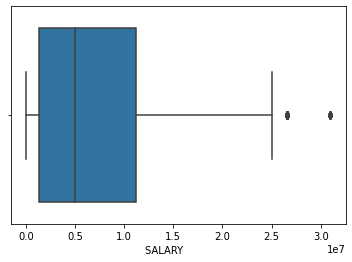

In [ ]:
import seaborn as sns
sns.boxplot(tabla_base["SALARY         "])

In [ ]:
tabla_base.iloc[np.where(tabla_base["SALARY         "]>25000000)]

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,STL,BLK,TOV,PF,PTS,RK,NAME,TEAM,SALARY,Team Rank
16746,16746,2004.0,LeBron James,SG,19.0,CLE,79.0,79.0,3122.0,18.3,...,130.0,58.0,273.0,149.0,1654.0,1.0,LeBron James,CLE,30963450.0,1.0
17344,17344,2005.0,LeBron James,SF,20.0,CLE,80.0,80.0,3388.0,25.7,...,177.0,52.0,262.0,146.0,2175.0,1.0,LeBron James,CLE,30963450.0,1.0
17918,17918,2006.0,LeBron James,SF,21.0,CLE,79.0,79.0,3361.0,28.1,...,123.0,66.0,260.0,181.0,2478.0,1.0,LeBron James,CLE,30963450.0,1.0
18460,18460,2007.0,LeBron James,SF,22.0,CLE,78.0,78.0,3190.0,24.5,...,125.0,55.0,250.0,171.0,2132.0,1.0,LeBron James,CLE,30963450.0,1.0
18849,18849,2008.0,Mike Conley,PG,20.0,MEM,53.0,46.0,1381.0,12.6,...,44.0,2.0,89.0,85.0,498.0,5.0,Mike Conley,MEM,26540100.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24239,24239,2017.0,Kevin Durant,SF,28.0,GSW,62.0,62.0,2070.0,27.6,...,66.0,99.0,138.0,117.0,1555.0,3.0,Kevin Durant,GSW,26540100.0,1.0
24306,24306,2017.0,James Harden,PG,27.0,HOU,81.0,81.0,2947.0,27.3,...,120.0,37.0,464.0,215.0,2356.0,4.0,James Harden,HOU,26540100.0,1.0
24343,24343,2017.0,Al Horford,C,30.0,BOS,68.0,68.0,2193.0,17.7,...,52.0,87.0,116.0,138.0,952.0,2.0,Al Horford,BOS,26540100.0,1.0
24365,24365,2017.0,LeBron James,SF,32.0,CLE,74.0,74.0,2794.0,27.0,...,92.0,44.0,303.0,134.0,1954.0,1.0,LeBron James,CLE,30963450.0,1.0


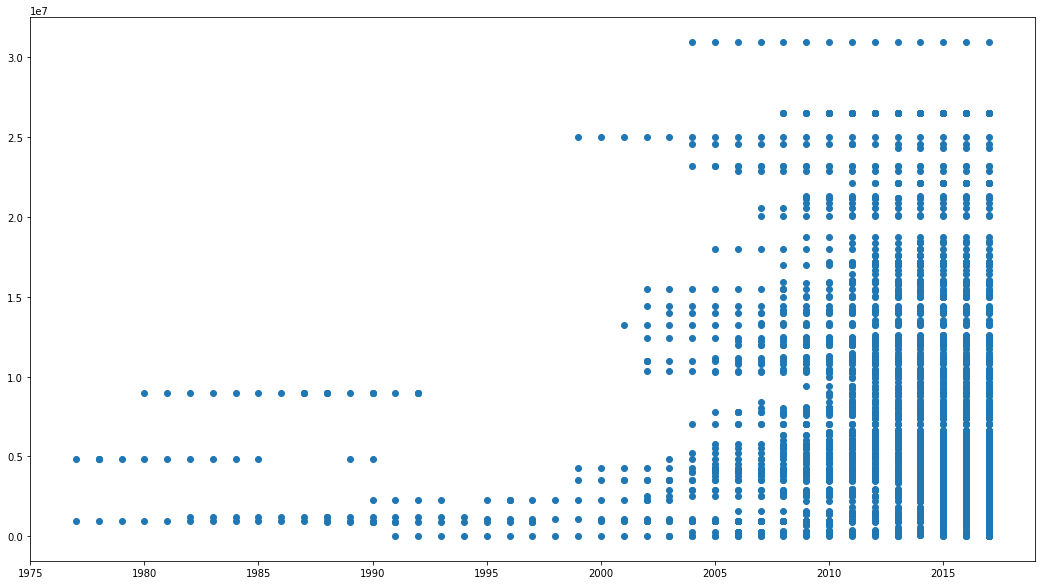

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(tabla_base['Year'], tabla_base['SALARY         '])
plt.show()

In [ ]:
#Llenar NA con media paraa que no afecten los outliers que hay varios
#tabla_base["SALARY         "].mean
tabla_base["SALARY         "].median()

tabla_base_C = tabla_base.fillna({
    "SALARY         ":tabla_base["SALARY         "].median(),
    "RK":tabla_base["RK"].median(),
    "Team Rank":tabla_base["Team Rank"].median()

})
tabla_base_C

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,STL,BLK,TOV,PF,PTS,RK,NAME,TEAM,SALARY,Team Rank
0,0,1950.0,Curly Armstrong,GF,31.0,FTW,63.0,8.0,1053.0,12.7,...,29.0,11.0,55.0,217.0,458.0,183.0,NaN,NaN,5000000.0,6.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,8.0,1053.0,12.7,...,29.0,11.0,55.0,99.0,279.0,183.0,NaN,NaN,5000000.0,6.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,8.0,1053.0,12.7,...,29.0,11.0,55.0,192.0,438.0,183.0,NaN,NaN,5000000.0,6.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,8.0,1053.0,12.7,...,29.0,11.0,55.0,29.0,63.0,183.0,NaN,NaN,5000000.0,6.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,8.0,1053.0,12.7,...,29.0,11.0,55.0,27.0,59.0,183.0,NaN,NaN,5000000.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,62.0,58.0,65.0,189.0,639.0,176.0,Cody Zeller,CHO,5318313.0,9.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,7.0,21.0,20.0,61.0,178.0,124.0,Tyler Zeller,BOS,8000000.0,4.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,2.0,5.0,3.0,17.0,23.0,391.0,Stephen Zimmerman,ORL,950000.0,15.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,15.0,16.0,40.0,78.0,240.0,410.0,Paul Zipser,CHI,750000.0,15.0


In [ ]:
#Quitar columnas que no necesitamos

#tabla_base_C = tabla_base_C.drop(["Player"], axis=1)
#tabla_base_C = tabla_base_C.drop(["Pos"], axis=1)
#tabla_base_C = tabla_base_C.drop(["blanl"], axis=1)
#tabla_base_C = tabla_base_C.drop(["Tm"], axis=1)
#tabla_base_C = tabla_base_C.drop(["NAME"], axis=1)
#tabla_base_C = tabla_base_C.drop(["TEAM"], axis=1)
#tabla_base_C = tabla_base_C.drop(["blank2"], axis=1)

tabla_base_C

,Unnamed: 0,Year,Age,G,GS,MP,PER,TS%,3PAr,FTr,...,TRB,AST,STL,BLK,TOV,PF,PTS,RK,SALARY,Team Rank
0,0,1950.0,31.0,63.0,8.0,1053.0,12.7,0.368,0.064,0.467,...,159.0,176.0,29.0,11.0,55.0,217.0,458.0,183.0,5000000.0,6.0
1,1,1950.0,29.0,49.0,8.0,1053.0,12.7,0.435,0.064,0.387,...,159.0,109.0,29.0,11.0,55.0,99.0,279.0,183.0,5000000.0,6.0
2,2,1950.0,25.0,67.0,8.0,1053.0,12.7,0.394,0.064,0.259,...,159.0,140.0,29.0,11.0,55.0,192.0,438.0,183.0,5000000.0,6.0
3,3,1950.0,24.0,15.0,8.0,1053.0,12.7,0.312,0.064,0.395,...,159.0,20.0,29.0,11.0,55.0,29.0,63.0,183.0,5000000.0,6.0
4,4,1950.0,24.0,13.0,8.0,1053.0,12.7,0.308,0.064,0.378,...,159.0,20.0,29.0,11.0,55.0,27.0,59.0,183.0,5000000.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,24.0,62.0,58.0,1725.0,16.7,0.604,0.002,0.442,...,405.0,99.0,62.0,58.0,65.0,189.0,639.0,176.0,5318313.0,9.0
24687,24687,2017.0,27.0,51.0,5.0,525.0,13.0,0.508,0.006,0.247,...,124.0,42.0,7.0,21.0,20.0,61.0,178.0,124.0,8000000.0,4.0
24688,24688,2017.0,20.0,19.0,0.0,108.0,7.3,0.346,0.000,0.161,...,35.0,4.0,2.0,5.0,3.0,17.0,23.0,391.0,950000.0,15.0
24689,24689,2017.0,22.0,44.0,18.0,843.0,6.9,0.503,0.448,0.181,...,125.0,36.0,15.0,16.0,40.0,78.0,240.0,410.0,750000.0,15.0


In [ ]:
tabla_base_C.shape

(24691, 51)

In [ ]:
# Llenar lo que queda con 0
tabla_base_Final = tabla_base_C.fillna(0)

tabla_base_Final

,Unnamed: 0,Year,Age,G,GS,MP,PER,TS%,3PAr,FTr,...,TRB,AST,STL,BLK,TOV,PF,PTS,RK,SALARY,Team Rank
0,0,1950.0,31.0,63.0,8.0,1053.0,12.7,0.368,0.064,0.467,...,159.0,176.0,29.0,11.0,55.0,217.0,458.0,183.0,5000000.0,6.0
1,1,1950.0,29.0,49.0,8.0,1053.0,12.7,0.435,0.064,0.387,...,159.0,109.0,29.0,11.0,55.0,99.0,279.0,183.0,5000000.0,6.0
2,2,1950.0,25.0,67.0,8.0,1053.0,12.7,0.394,0.064,0.259,...,159.0,140.0,29.0,11.0,55.0,192.0,438.0,183.0,5000000.0,6.0
3,3,1950.0,24.0,15.0,8.0,1053.0,12.7,0.312,0.064,0.395,...,159.0,20.0,29.0,11.0,55.0,29.0,63.0,183.0,5000000.0,6.0
4,4,1950.0,24.0,13.0,8.0,1053.0,12.7,0.308,0.064,0.378,...,159.0,20.0,29.0,11.0,55.0,27.0,59.0,183.0,5000000.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,24.0,62.0,58.0,1725.0,16.7,0.604,0.002,0.442,...,405.0,99.0,62.0,58.0,65.0,189.0,639.0,176.0,5318313.0,9.0
24687,24687,2017.0,27.0,51.0,5.0,525.0,13.0,0.508,0.006,0.247,...,124.0,42.0,7.0,21.0,20.0,61.0,178.0,124.0,8000000.0,4.0
24688,24688,2017.0,20.0,19.0,0.0,108.0,7.3,0.346,0.000,0.161,...,35.0,4.0,2.0,5.0,3.0,17.0,23.0,391.0,950000.0,15.0
24689,24689,2017.0,22.0,44.0,18.0,843.0,6.9,0.503,0.448,0.181,...,125.0,36.0,15.0,16.0,40.0,78.0,240.0,410.0,750000.0,15.0


**Inicio PCA**

In [ ]:
# Label Encoding
from sklearn.decomposition import PCA

X = tabla_base_Final.iloc[:,2:51]
d = 49
pca = PCA(n_components = 49)
X_d = pca.fit_transform(X)
X_d

array([[-3.00940934e+05, -4.27230429e+01,  1.74255511e+02, ...,
         7.07985228e-04, -4.21968339e-10,  1.90350855e-09],
       [-3.00940957e+05, -3.04986061e+02, -1.30898267e+02, ...,
        -5.10768731e-04, -2.37776807e-09, -5.38569763e-09],
       [-3.00940937e+05, -7.48264311e+01,  1.39032159e+02, ...,
        -1.14830157e-04,  1.21905169e-08,  2.01419817e-09],
       ...,
       [-4.35094103e+06, -1.00310170e+03,  1.16235420e+02, ...,
         1.88256390e-03, -1.10235182e-10, -2.20676650e-10],
       [-4.55094097e+06, -2.07318326e+02, -1.23010044e+02, ...,
         2.25775953e-03, -1.32388634e-10, -1.58215759e-10],
       [-4.26598497e+06, -3.34067550e+02,  1.14673288e+02, ...,
        -2.61822903e-04, -5.84073882e-11, -2.38004295e-10]])

In [ ]:
# Ver que todo vaya bien
X_d.shape

(24691, 49)

In [ ]:
X.shape

(24691, 49)

**Componentes**

In [ ]:
c1 = pca.components_.T[:,:]
c1

array([[-8.69140390e-08,  2.06143077e-04, -9.56599110e-04, ...,
         1.35814490e-05,  0.00000000e+00, -0.00000000e+00],
       [ 1.12864509e-06,  1.78892566e-02, -2.68383559e-02, ...,
        -5.76505388e-06, -1.26078307e-15, -2.55927469e-15],
       [ 2.27133387e-06,  1.35998067e-02, -2.23425686e-02, ...,
         1.12209909e-05,  1.03867127e-14,  5.42412930e-17],
       ...,
       [-1.50724151e-05,  7.39121800e-04, -8.28279585e-04, ...,
        -1.56201208e-06, -1.05471187e-15, -6.10622664e-16],
       [ 9.99999996e-01, -8.49210565e-05, -2.60370942e-06, ...,
         3.93313854e-13,  0.00000000e+00,  5.55111512e-17],
       [-4.66488725e-07,  3.25732294e-05, -1.06284426e-04, ...,
        -3.14458811e-05,  3.36952688e-14,  5.13478149e-16]])

**Usamos la función con componentes y varianza**

In [ ]:
def get_pca_components(pca, var):
    cumm_var = pca.explained_variance_ratio_
    total_var = 0.
    N_COMPONENTS = 0
    for i in cumm_var:
        N_COMPONENTS += 1
        total_var += i
        if total_var >= var:
            break
    return N_COMPONENTS

In [ ]:
pca = PCA().fit(X)
n_components = get_pca_components(pca, 0.999999997999999999999999999999999)
n_components

7

In [ ]:
pca.explained_variance_ratio_

array([9.99999773e-01, 2.08942180e-07, 8.60130366e-09, 4.38333099e-09,
       1.72005157e-09, 9.84693518e-10, 8.52928416e-10, 6.41407794e-10,
       2.56497042e-10, 1.83362416e-10, 1.40732246e-10, 1.08581460e-10,
       6.98360069e-11, 6.42705174e-11, 4.37546837e-11, 3.20083011e-11,
       2.14812939e-11, 1.72320251e-11, 6.72492547e-12, 6.64566812e-12,
       4.82275050e-12, 4.37527119e-12, 2.81531981e-12, 2.29128003e-12,
       1.83914572e-12, 1.19731247e-12, 7.82224486e-13, 5.80794357e-13,
       3.01259064e-13, 1.67487746e-13, 1.29884271e-13, 7.40807957e-14,
       5.28701158e-14, 3.67981192e-14, 2.99798069e-14, 2.75418697e-14,
       6.97244137e-15, 5.54705402e-15, 3.02671690e-15, 2.27858284e-15,
       1.99834315e-15, 1.29190935e-15, 1.39551614e-16, 1.15968213e-16,
       1.06718630e-16, 5.66527623e-17, 3.32752558e-18, 9.95302365e-33,
       9.95302365e-33])

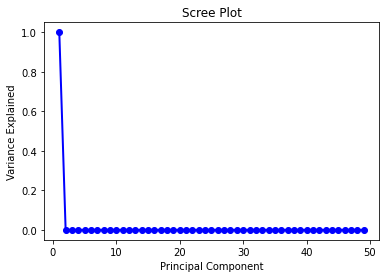

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

**Comparar los dos primeros componentes**

In [ ]:
def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

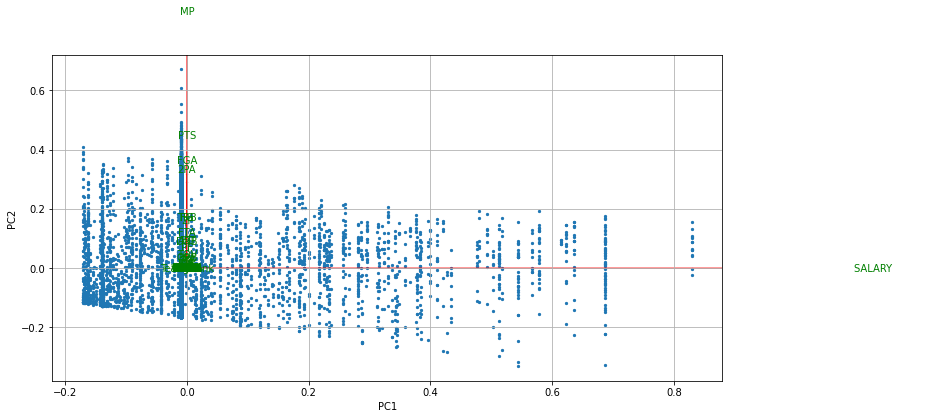

In [198]:
plt.figure(figsize=(12, 6))
biplot(X_d, np.transpose(pca.components_), list(X.columns))